<a href="https://colab.research.google.com/github/nikhardoshi/Covid19Detection/blob/main/ProjectCovid19XRay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install kaggle
# ! mkdir ~/.kaggle
# ! cp kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets download -d pranavraikokte/covid19-image-dataset

In [2]:
!unzip /content/drive/MyDrive/ML_Datasets/imagedataset.zip

Archive:  /content/drive/MyDrive/ML_Datasets/imagedataset.zip
   creating: imagedataset/Covid19-dataset/
   creating: imagedataset/Covid19-dataset/test/
   creating: imagedataset/Covid19-dataset/test/Covid/
  inflating: imagedataset/Covid19-dataset/test/Covid/0100.jpeg  
  inflating: imagedataset/Covid19-dataset/test/Covid/0102.jpeg  
  inflating: imagedataset/Covid19-dataset/test/Covid/0105.png  
  inflating: imagedataset/Covid19-dataset/test/Covid/0106.jpeg  
  inflating: imagedataset/Covid19-dataset/test/Covid/0108.jpeg  
  inflating: imagedataset/Covid19-dataset/test/Covid/0111.jpg  
  inflating: imagedataset/Covid19-dataset/test/Covid/0112.jpg  
  inflating: imagedataset/Covid19-dataset/test/Covid/0113.jpg  
  inflating: imagedataset/Covid19-dataset/test/Covid/0115.jpeg  
  inflating: imagedataset/Covid19-dataset/test/Covid/0118.jpeg  
  inflating: imagedataset/Covid19-dataset/test/Covid/0119.jpeg  
  inflating: imagedataset/Covid19-dataset/test/Covid/0120.jpg  
  inflating: image

In [3]:
trpath='/content/imagedataset/Covid19-dataset/train'
vdpath='/content/imagedataset/Covid19-dataset/valid'
ttpath= '/content/imagedataset/Covid19-dataset/test'

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, InputLayer,LeakyReLU,BatchNormalization
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip,RandomZoom,RandomContrast, RandomRotation
from tensorflow.keras.optimizers import Adam,SGD
from keras.applications import imagenet_utils
import pathlib
import os
import glob
import shutil
import PIL
import cv2
import itertools
from sklearn.model_selection import train_test_split
from keras.metrics import CategoricalCrossentropy
from keras.preprocessing.image import ImageDataGenerator

In [5]:
train_batch=ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=trpath,target_size=(224,224),classes=['Covid','Normal','Viral Pneumonia'],batch_size=10)
valid_batch=ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=vdpath,target_size=(224,224),classes=['Covid','Normal','Viral Pneumonia'],batch_size=10)
test_batch=ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=ttpath,target_size=(224,224),classes=['Covid','Normal','Viral Pneumonia'],batch_size=10,shuffle=False)

Found 191 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [6]:
img,labels=next(train_batch)
img1,labels1=next(test_batch)

In [7]:
def plotImages(imgs):
  fig,axes=plt.subplots(1,10,figsize=(20,20))
  axes=axes.flatten()
  for img,ax in zip(imgs,axes):
    ax.imshow(img)
    print(img.shape)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


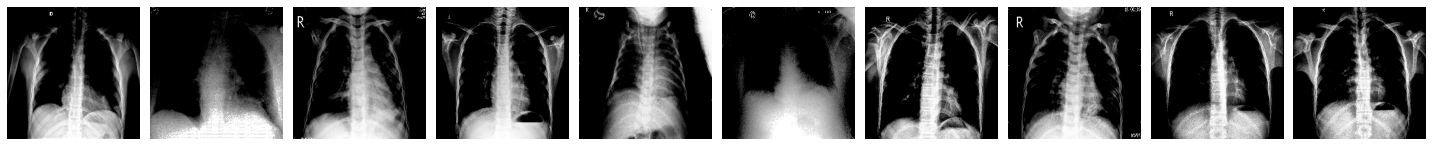

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [8]:
plotImages(img)
print(labels)

In [9]:
mobile=tf.keras.applications.mobilenet.MobileNet()

17225924/17225924 [==============================] - 0s 0us/step


In [10]:
x=mobile.layers[-5].output
output=Flatten()(x)
finoutput=Dense(units=3,activation='softmax')(output)

In [11]:
mob_net=Model(inputs=mobile.input,outputs=finoutput)
for i in mob_net.layers[:-23]:
  i.trainable=False
mob_net.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [12]:
sgd = SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)

In [13]:
mob_net.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
history=mob_net.fit(x=train_batch,validation_data=valid_batch,epochs=30,verbose=2)

Epoch 1/30
20/20 - 24s - loss: 0.6866 - accuracy: 0.7173 - val_loss: 2.7430 - val_accuracy: 0.4500 - 24s/epoch - 1s/step
Epoch 2/30
20/20 - 9s - loss: 0.1991 - accuracy: 0.9215 - val_loss: 3.3663 - val_accuracy: 0.4667 - 9s/epoch - 464ms/step
Epoch 3/30
20/20 - 9s - loss: 0.1715 - accuracy: 0.9372 - val_loss: 2.8369 - val_accuracy: 0.4833 - 9s/epoch - 463ms/step
Epoch 4/30
20/20 - 9s - loss: 0.1108 - accuracy: 0.9476 - val_loss: 1.7046 - val_accuracy: 0.5333 - 9s/epoch - 461ms/step
Epoch 5/30
20/20 - 9s - loss: 0.1094 - accuracy: 0.9738 - val_loss: 2.0232 - val_accuracy: 0.5167 - 9s/epoch - 468ms/step
Epoch 6/30
20/20 - 9s - loss: 0.1007 - accuracy: 0.9738 - val_loss: 1.8017 - val_accuracy: 0.5167 - 9s/epoch - 463ms/step
Epoch 7/30
20/20 - 9s - loss: 0.0422 - accuracy: 0.9948 - val_loss: 1.7543 - val_accuracy: 0.5333 - 9s/epoch - 460ms/step
Epoch 8/30
20/20 - 10s - loss: 0.1470 - accuracy: 0.9581 - val_loss: 1.2355 - val_accuracy: 0.6333 - 10s/epoch - 497ms/step
Epoch 9/30
20/20 - 10s 

In [14]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [15]:
import gc
gc.collect()

332

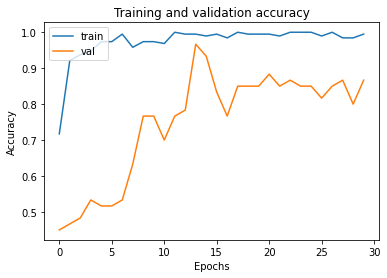

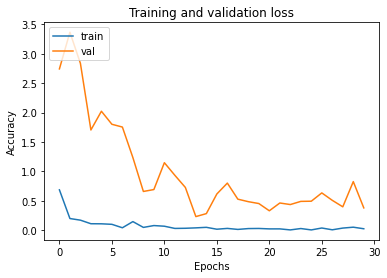

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Training and validation loss')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [17]:
preds=mob_net.predict(test_batch)

7/7 [==============================] - 2s 253ms/step


In [18]:
mob_net.evaluate(test_batch)

7/7 [==============================] - 1s 203ms/step - loss: 0.2833 - accuracy: 0.8636


[0.28331083059310913, 0.8636363744735718]

In [19]:
test_labels=test_batch.classes

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
cm=confusion_matrix(y_true=test_labels,y_pred=preds.argmax(axis=1))

In [22]:
res=[]
for i in preds:
  res.append(np.argmax(i))

In [23]:
test_batch.class_indices

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}

In [24]:
  def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[26  0  0]
 [ 0 11  9]
 [ 0  0 20]]


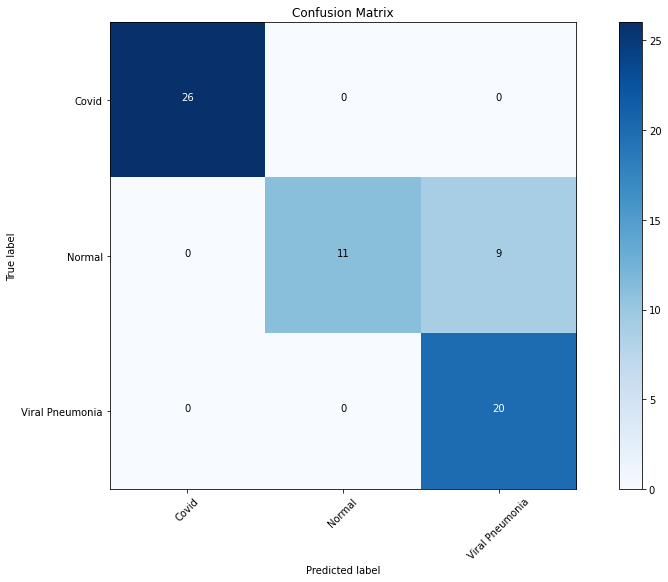

In [25]:
plt.figure(figsize=(12,8))
cm_plot_labels=['Covid','Normal','Viral Pneumonia']
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title="Confusion Matrix")

In [26]:
from sklearn.metrics import classification_report

In [27]:
print("Classification Report: \n",classification_report(test_labels,res))

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      0.55      0.71        20
           2       0.69      1.00      0.82        20

    accuracy                           0.86        66
   macro avg       0.90      0.85      0.84        66
weighted avg       0.91      0.86      0.86        66

